## 1. Data Preparation

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

c:\Users\Aqsa\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Load dataset
df = pd.read_csv('heart_disease.csv')

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,FALSE,1.5,upsloping,normal,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,TRUE,3.0,flat,fixed defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,TRUE,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,normal,4


In [4]:

# Preview the data
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0


In [5]:
df=df.replace({True: 1, False: 0})
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,1,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,0,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,0,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,0,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,0,normal,126,TRUE,1.5,flat,fixed defect,0


In [6]:
u1=df['sex'].unique()
u2=df['cp'].unique()
u3=df['fbs'].unique()
u4=df['restecg'].unique()
u5=df['exang'].unique()
u6=df['slope'].unique()
u7=df['thal'].unique()
print (u1)
print (u2)
print (u3)
print (u4)
print (u5)
print (u6)
print (u7)

['Male' 'Female']
['typical angina' 'atypical angina' 'asymptomatic' 'non-anginal']
[1 0]
['lv hypertrophy' 'normal' 'st-t abnormality']
['FALSE' 'TRUE' 'TURE']
['downsloping' 'flat' 'upsloping']
['fixed defect' 'normal' 'reversable defect']


In [7]:
## Define the mapping dictionary
df['sex']=df['sex'].map({'Male':1,'Female':2})
df['cp']=df['cp'].map({'typical angina':1,'atypical angina':2,'asymptomatic':3,'non-anginal':4})
df['restecg']=df['restecg'].map({'lv hypertrophy':1,'normal':2,'st-t abnormality':3})
df['exang']=df['exang'].map({'TRUE':1,'FALSE':0,'TURE':1})
df['slope']=df['slope'].map({'downsloping':1,'flat':2,'upsloping':3})
df['thal']=df['thal'].map({'fixed defect':1,'normal':2,'reversable defect':3})
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,1,145,233,1,1,150,0,2.3,1,1,0
1,41,1,2,135,203,0,2,132,0,0.0,2,1,0
2,57,1,3,140,192,0,2,148,0,0.4,2,1,0
3,52,1,1,118,186,0,1,190,0,0.0,2,1,0
4,57,1,3,110,201,0,2,126,1,1.5,2,1,0


## 2. Exploratory Data Analysis (EDA)

In [8]:
# Check for missing values
print(df.isnull().sum())

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64


In [9]:
df.shape

(908, 13)

In [10]:
df.dropna(subset=["oldpeak"], inplace=True)

In [11]:
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64


In [12]:
df.shape

(846, 13)

In [13]:
# Get summary statistics
print(df.describe())

              age         sex          cp    trestbps        chol         fbs  \
count  846.000000  846.000000  846.000000  846.000000  846.000000  846.000000   
mean    53.425532    1.223404    2.936170  132.449173  202.652482    0.186761   
std      9.099243    0.416773    0.768117   19.243667  111.654072    0.389950   
min     29.000000    1.000000    1.000000    0.000000    0.000000    0.000000   
25%     47.000000    1.000000    3.000000  120.000000  177.250000    0.000000   
50%     54.000000    1.000000    3.000000  130.000000  225.000000    0.000000   
75%     60.000000    1.000000    3.000000  140.000000  269.750000    0.000000   
max     77.000000    2.000000    4.000000  200.000000  603.000000    1.000000   

          restecg      thalch       exang     oldpeak       slope        thal  \
count  846.000000  846.000000  846.000000  846.000000  846.000000  846.000000   
mean     1.959811  137.167849    0.393617    0.891253    2.154846    2.169031   
std      0.619824   25.6084

## Visualize data:

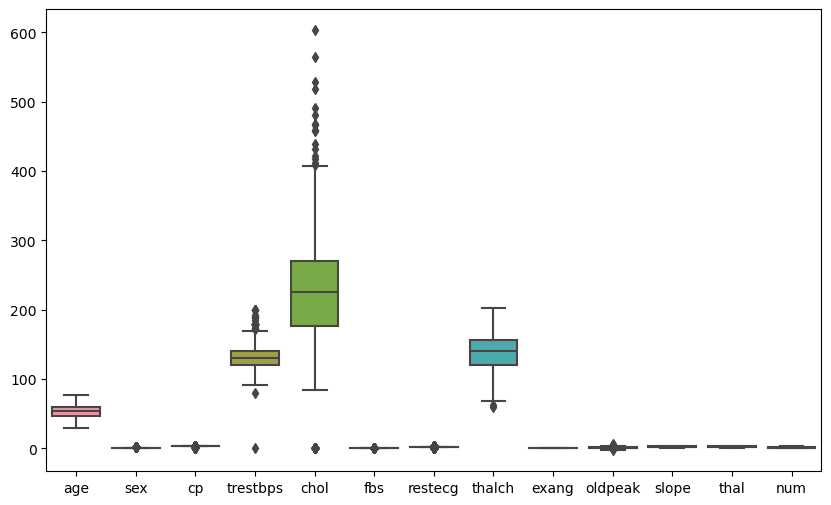

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.boxplot(data=df)
plt.show()

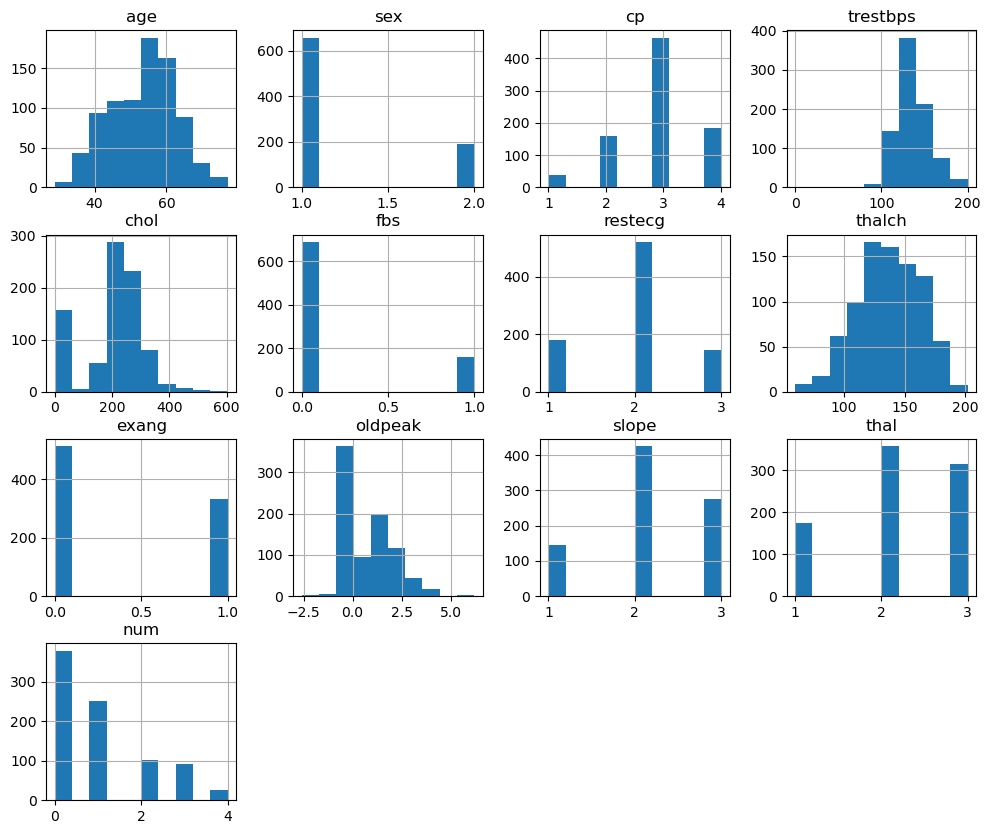

In [15]:
# Histograms
df.hist(figsize=(12, 10))
plt.show()

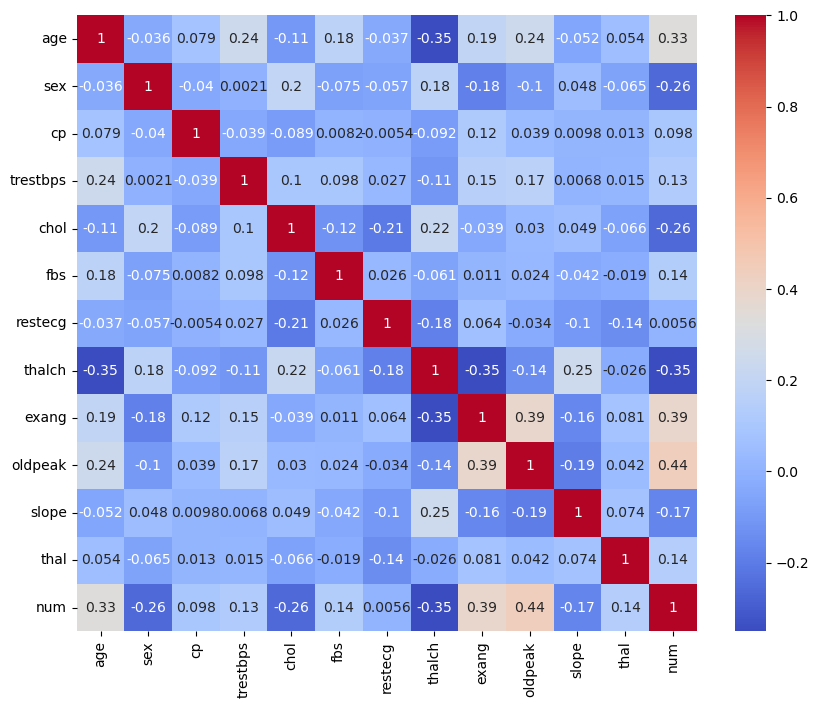

In [16]:
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

## 3. Feature Engineering

## Encoding categorical variables:
Convert the categorical variables (sex, cp, restecg, exang, slope, thal) into numeric form using one-hot encoding.

In [17]:
df = pd.get_dummies(df, columns=['cp', 'restecg', 'slope', 'thal'], drop_first=True)

In [18]:
df

,age,sex,trestbps,chol,fbs,thalch,exang,oldpeak,num,cp_2,cp_3,cp_4,restecg_2,restecg_3,slope_2,slope_3,thal_2,thal_3
0,63,1,145,233,1,150,0,2.3,0,False,False,False,False,False,False,False,False,False
1,41,1,135,203,0,132,0,0.0,0,True,False,False,True,False,True,False,False,False
2,57,1,140,192,0,148,0,0.4,0,False,True,False,True,False,True,False,False,False
3,52,1,118,186,0,190,0,0.0,0,False,False,False,False,False,True,False,False,False
4,57,1,110,201,0,126,1,1.5,0,False,True,False,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,51,1,110,0,1,92,0,0.0,4,False,True,False,True,False,True,False,False,True
902,62,1,160,254,1,108,1,3.0,4,False,True,False,False,True,True,False,False,False
903,53,1,125,0,0,120,0,1.5,4,False,True,False,True,False,False,True,True,False
904,62,1,166,170,0,120,1,3.0,4,False,True,False,False,True,True,False,False,False


## Scaling numeric features:
You may want to scale numerical features like age, trestbps, chol, and thalch.

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['age', 'trestbps', 'chol', 'thalch', 'oldpeak']] = scaler.fit_transform(df[['age', 'trestbps', 'chol', 'thalch', 'oldpeak']])

## 4. Decision Tree Classification

## Split the dataset: 
Split the dataset into training and testing sets (e.g., 80% for training and 20% for testing).

In [20]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = df.drop(columns=['num'])  # Adjust based on your actual target column
y = df['num']

In [21]:
X

,age,sex,trestbps,chol,fbs,thalch,exang,oldpeak,cp_2,cp_3,cp_4,restecg_2,restecg_3,slope_2,slope_3,thal_2,thal_3
0,1.052849,1,0.652591,0.271960,1,0.501387,0,1.288612,False,False,False,False,False,False,False,False,False
1,-1.366364,1,0.132633,0.003114,0,-0.201922,0,-0.815249,True,False,False,True,False,True,False,False,False
2,0.393064,1,0.392612,-0.095463,0,0.423242,0,-0.449360,False,True,False,True,False,True,False,False,False
3,-0.156758,1,-0.751298,-0.149232,0,2.064297,0,-0.815249,False,False,False,False,False,True,False,False,False
4,0.393064,1,-1.167265,-0.014809,0,-0.436358,1,0.556834,False,True,False,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,-0.266722,1,-1.167265,-1.816077,1,-1.764831,0,-0.815249,False,True,False,True,False,True,False,False,True
902,0.942885,1,1.432530,0.460152,1,-1.139668,1,1.928917,False,True,False,False,True,True,False,False,False
903,-0.046793,1,-0.387326,-1.816077,0,-0.670795,0,0.556834,False,True,False,True,False,False,True,True,False
904,0.942885,1,1.744505,-0.292616,0,-0.670795,1,1.928917,False,True,False,False,True,True,False,False,False


In [22]:
y

0      0
1      0
2      0
3      0
4      0
      ..
901    4
902    4
903    4
904    4
905    4
Name: num, Length: 846, dtype: int64

In [23]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
X_train

,age,sex,trestbps,chol,fbs,thalch,exang,oldpeak,cp_2,cp_3,cp_4,restecg_2,restecg_3,slope_2,slope_3,thal_2,thal_3
701,1.712635,1,0.392612,0.460152,0,0.345096,0,1.014195,False,False,True,False,False,True,False,False,True
669,1.382742,1,1.432530,0.388460,0,-0.670795,1,-0.815249,True,False,False,True,False,True,False,False,False
593,0.393064,1,-0.231339,-1.816077,1,0.423242,1,0.099473,False,True,False,False,True,True,False,False,False
836,-1.146436,1,-1.687224,-1.816077,0,-0.592649,0,0.556834,False,True,False,True,False,False,False,False,False
562,-0.486650,1,-0.127347,1.239806,0,-0.670795,1,0.099473,False,True,False,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,-0.706579,1,0.288620,0.487037,0,0.735824,0,-0.815249,False,False,True,False,False,False,True,True,False
107,-0.816543,2,-1.427244,0.012076,0,1.360987,0,-0.815249,True,False,False,True,False,False,True,True,False
271,-0.046793,2,-0.647306,0.639383,0,-0.280067,0,-0.815249,False,False,True,True,False,False,True,False,False
457,1.822599,1,-0.907285,-1.816077,0,-1.764831,1,-0.815249,False,True,False,False,True,True,False,False,True


In [25]:
X_test

,age,sex,trestbps,chol,fbs,thalch,exang,oldpeak,cp_2,cp_3,cp_4,restecg_2,restecg_3,slope_2,slope_3,thal_2,thal_3
40,-1.366364,1,-0.127347,0.101691,0,1.204696,0,1.014195,False,False,True,False,False,True,False,True,False
251,0.283099,1,-0.127347,2.297266,0,-0.905231,0,-0.815249,False,False,True,True,False,False,True,True,False
315,-1.256400,1,-0.647306,-0.059616,0,0.501387,0,-0.815249,True,False,False,True,False,True,False,True,False
97,-1.036472,1,-0.647306,0.209230,0,1.243769,0,-0.815249,False,False,True,True,False,False,True,True,False
199,1.052849,1,-0.127347,-1.816077,1,0.892115,0,1.928917,False,False,True,False,True,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
840,0.612992,1,-0.387326,0.173383,0,-0.084704,1,1.471556,False,True,False,True,False,False,False,False,False
2,0.393064,1,0.392612,-0.095463,0,0.423242,0,-0.449360,False,True,False,True,False,True,False,False,False
805,-0.046793,1,-0.491318,0.711075,0,-1.647613,1,1.014195,False,True,False,True,False,True,False,False,True
823,1.822599,1,0.392612,-1.816077,1,0.774896,1,1.014195,False,True,False,True,False,True,False,False,True


In [26]:
y_train

701    2
669    2
593    1
836    3
562    1
      ..
72     0
107    0
271    0
457    1
103    0
Name: num, Length: 676, dtype: int64

In [27]:
y_test

40     0
251    0
315    0
97     0
199    0
      ..
840    3
2      0
805    3
823    3
312    0
Name: num, Length: 170, dtype: int64

## Train the Decision Tree model:

In [28]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier
model = DecisionTreeClassifier()

# Train the model
model.fit(X_train, y_train)


DecisionTreeClassifier()

## Evaluate the model:

In [29]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# Make predictions
y_pred = model.predict(X_test)

In [30]:
y_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 2, 1, 0,
       3, 3, 1, 0, 1, 1, 1, 0, 0, 1, 2, 0, 2, 0, 0, 0, 1, 4, 0, 0, 0, 1,
       2, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 2, 0, 1, 1, 3, 0, 0, 1, 1, 0, 3, 1, 2, 1, 3, 1, 0, 0, 0, 1, 0,
       3, 2, 3, 0, 0, 0, 0, 0, 3, 3, 1, 1, 0, 2, 1, 0, 0, 0, 1, 4, 1, 1,
       0, 2, 0, 3, 0, 0, 1, 2, 1, 0, 0, 1, 1, 1, 2, 1, 0, 2, 0, 4, 0, 0,
       2, 0, 2, 0, 2, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 4, 0, 0, 2, 2, 1, 1,
       0, 1, 2, 0, 0, 0, 2, 0, 2, 1, 0, 1, 1, 1, 3, 0], dtype=int64)

In [31]:

# Evaluate the model
print(classification_report(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.74      0.73        80
           1       0.36      0.46      0.40        41
           2       0.38      0.57      0.46        14
           3       0.18      0.07      0.11        27
           4       0.25      0.12      0.17         8

    accuracy                           0.52       170
   macro avg       0.38      0.39      0.37       170
weighted avg       0.50      0.52      0.50       170

Accuracy: 0.5235294117647059


In [32]:
# Predict probabilities for all classes
y_proba = model.predict_proba(X_test)

# Compute ROC-AUC score using 'ovr' (One-vs-Rest)
print('ROC-AUC:', roc_auc_score(y_test, y_proba, multi_class='ovr'))

# Or, alternatively, use 'ovo' (One-vs-One)
#print('ROC-AUC:', roc_auc_score(y_test, y_proba, multi_class='ovo'))


ROC-AUC: 0.629861802894276


In [33]:
print(y_test.unique())

[0 1 2 3 4]


In [34]:
y_proba

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0.

## 5. Hyperparameter Tuning

Optimize the performance of your Decision Tree model by tuning hyperparameters like max_depth, min_samples_split, and criterion.

In [35]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

In [36]:
param_grid

{'max_depth': [3, 5, 10, None],
 'min_samples_split': [2, 5, 10],
 'criterion': ['gini', 'entropy']}

In [37]:
# Initialize GridSearchCV
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')

In [38]:
grid_search

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [39]:
# Train on the training set
grid_search.fit(X_train, y_train)

# Best parameters
print('Best hyperparameters:', grid_search.best_params_)

Best hyperparameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}


## 6. Model Evaluation and Analysis

Analyse performance: Use metrics like accuracy, precision, recall, F1-score, and ROC-AUC to understand model performance.

In [40]:
print("Best model performance:")
y_pred_best = grid_search.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred_best))

Best model performance:
              precision    recall  f1-score   support

           0       0.77      0.90      0.83        80
           1       0.34      0.63      0.44        41
           2       0.00      0.00      0.00        14
           3       0.00      0.00      0.00        27
           4       0.00      0.00      0.00         8

    accuracy                           0.58       170
   macro avg       0.22      0.31      0.25       170
weighted avg       0.44      0.58      0.50       170



## Visualize the Decision Tree:

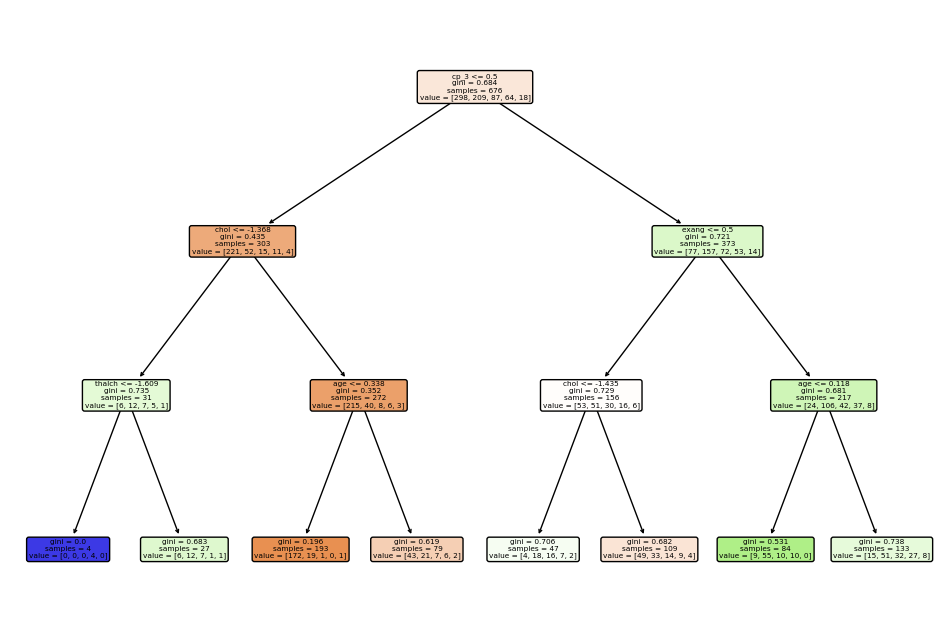

In [41]:
from sklearn.tree import plot_tree

# Visualize the tree
plt.figure(figsize=(12, 8))
plot_tree(grid_search.best_estimator_, feature_names=X.columns, filled=True, rounded=True)
plt.show()

## Feature Importance:
Check which features are most important in the decision-making process. You can access the feature importance through the model’s feature_importances_ attribute.

In [43]:
best_model = grid_search.best_estimator_
importances = best_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
print(feature_importance_df.sort_values(by='Importance', ascending=False))

      Feature  Importance
9        cp_3    0.575541
3        chol    0.180900
0         age    0.132395
6       exang    0.070660
5      thalch    0.040503
11  restecg_2    0.000000
15     thal_2    0.000000
14    slope_3    0.000000
13    slope_2    0.000000
12  restecg_3    0.000000
8        cp_2    0.000000
10       cp_4    0.000000
1         sex    0.000000
7     oldpeak    0.000000
4         fbs    0.000000
2    trestbps    0.000000
16     thal_3    0.000000


## Interview Questions:

## 1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

1. max_depth: Limits the tree's depth. Small depth can cause underfitting; large depth can cause overfitting.
    
2. min_samples_split: Minimum samples required to split a node. Small values may overfit; larger values prevent overfitting but risk underfitting.
    
3. min_samples_leaf: Minimum samples in a leaf node. Small values create more complex trees; larger values generalize better.
    
4. max_features: Limits the number of features considered per split. Fewer features can reduce overfitting.
    
5. criterion: Splitting strategy (gini or entropy). Gini is faster; entropy may produce slightly better splits.
    
6. splitter: How to choose the split (best or random). Best is more accurate; random is faster.
    
7. max_leaf_nodes: Limits the number of leaf nodes. Fewer nodes can prevent overfitting.
    
8. class_weight: Handles imbalanced data by giving more weight to minority classes.
    
These hyperparameters need to be tuned to balance between underfitting and overfitting.

## 2. What is the difference between the Label encoding and One-hot encoding?
The key differences between Label Encoding and One-Hot Encoding are:

* Label Encoding:

Converts categorical values into integers (e.g., "Male" = 0, "Female" = 1).

Preserves ordinal relationships (if any) but can unintentionally introduce a false sense of ranking for non-ordinal data.

Suitable for ordinal categories (like "Low", "Medium", "High").

* One-Hot Encoding:

Converts categorical values into separate binary columns (e.g., "Male" = [1, 0], "Female" = [0, 1]).

No ordinal relationship is assumed between categories.

Suitable for nominal (non-ordinal) data, preventing the model from inferring incorrect relationships.

One-Hot Encoding is preferred for nominal variables, while Label Encoding can be used for ordinal ones.